In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

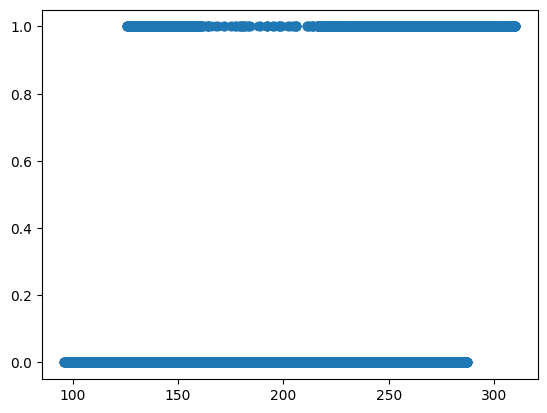

In [3]:
data = pd.read_csv("datasets/HR_comma_sep.csv")
plt.scatter(data['average_montly_hours'], data['left'])
plt.show()

In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.groupby('left').mean(numeric_only=True)
# We can infer the following for the people who left:
    # satisfaction level is lower
    # average monthly hours is higher
    # lower chance of promotion in last 5 years
# Hence, these three factors are chosen as independent variables


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [6]:
x = data[['average_montly_hours', 'satisfaction_level', 'promotion_last_5years']]
y = data['left']  
y.head()
# print(np.shape(x), np.shape(y))

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size = 0.2)

In [8]:
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

(11999, 3)
(11999,)
(3000, 3)
(3000,)


In [9]:
# plt.scatter(x_train, y_train, label="Training Data", color='b', alpha=0.7)
# plt.scatter(x_test, y_test, label="Testing Data", color='r', alpha=0.1)
# plt.legend()
# plt.title("Train vs Test Split")
# plt.show()

In [10]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [11]:
predicted = model.predict(x_test)

In [12]:
model.score(x_test, y_test)

0.7676666666666667

In [13]:
cm = confusion_matrix(predicted, y_test)
cm

# cm[0][0] = TP - Predicted employee will leave and employee actually left
# cm[1][1] = TN - Predicted employee will not leave and employee actually didnt leave
# cm[0][1] = FP - Predicted employee will leave but employee actually didnt leave
# cm[1][0] = FN - Predicted employee will not leave but employee actually left

array([[2113,  501],
       [ 196,  190]])